In [14]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, cross_val_score , GridSearchCV
from sklearn.utils.multiclass import unique_labels
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [15]:
#importing train_test_split
from sklearn.model_selection import train_test_split

In [16]:
data = pd.read_excel("StateCode.xlsx")

In [17]:
data.head()

,mw,code,temp,moisture,mvar,unit_no,mw_declare,Unnamed: 7,Unnamed: 8
0,95,SO,32,10.0,17.0,1,132,NaN,NaN
1,106,SO,43,6.0,25.0,1,132,NaN,NaN
2,118,LF1,26,10.0,43.0,3,132,NaN,NaN
3,122,LF1,39,7.0,43.0,3,148,NaN,NaN
4,120,SO,41,12.0,46.0,3,148,NaN,NaN


In [18]:
data['code'].value_counts()

SO      36264
LF1     16195
PO       6319
LP       2189
PM       1172
LA        597
R         548
FP        530
FO        509
FA        248
FQ        233
LD        166
LQ        161
LG3       155
LG5        80
RLP        58
FG1        52
PA         22
RLF1       20
LG          6
FG          5
LG1         3
LF0         1
LF2         1
O           1
Name: code, dtype: int64

In [19]:
data.isnull().sum()

mw                0
code              0
temp              0
moisture          0
mvar              0
unit_no           0
mw_declare        0
Unnamed: 7    65535
Unnamed: 8    65535
dtype: int64

In [20]:
data.corr()

,mw,temp,moisture,mvar,unit_no,mw_declare,Unnamed: 7,Unnamed: 8
mw,1.000000,0.274587,-0.198427,0.086293,0.175056,-0.048125,NaN,NaN
temp,0.274587,1.000000,-0.737806,0.476065,0.005728,0.205162,NaN,NaN
moisture,-0.198427,-0.737806,1.000000,-0.307782,-0.009537,-0.108309,NaN,NaN
mvar,0.086293,0.476065,-0.307782,1.000000,-0.095130,0.147524,NaN,NaN
unit_no,0.175056,0.005728,-0.009537,-0.095130,1.000000,-0.308501,NaN,NaN
mw_declare,-0.048125,0.205162,-0.108309,0.147524,-0.308501,1.000000,NaN,NaN
Unnamed: 7,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Unnamed: 8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
X = data[["mw","temp","moisture","mvar","mw_declare","unit_no"]]
y = data["code"]
y

0         SO
1         SO
2        LF1
3        LF1
4         SO
        ... 
65530     SO
65531     SO
65532     SO
65533     FP
65534    LF1
Name: code, Length: 65535, dtype: object

In [22]:
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns = X.columns)
X

,mw,temp,moisture,mvar,mw_declare,unit_no
0,-0.091759,0.709156,-0.819521,0.563184,0.485975,-1.544303
1,0.150170,1.738607,-0.977919,0.943616,0.485975,-1.544303
2,0.414092,0.147638,-0.819521,1.799589,0.485975,-0.771187
3,0.502066,1.364262,-0.938320,1.799589,1.505249,-0.771187
4,0.458079,1.551435,-0.740321,1.942251,1.505249,-0.771187
...,...,...,...,...,...,...
65530,0.040202,-0.320295,-0.027528,-0.340342,0.103747,-1.544303
65531,0.062196,-0.413881,-0.265126,-0.530558,0.103747,-1.544303
65532,0.128177,0.709156,-0.700722,-0.102572,0.103747,-1.544303
65533,-2.181143,1.177089,-0.938320,-0.245234,1.123021,-1.157745


Text(0.5, 1.0, 'Success ')

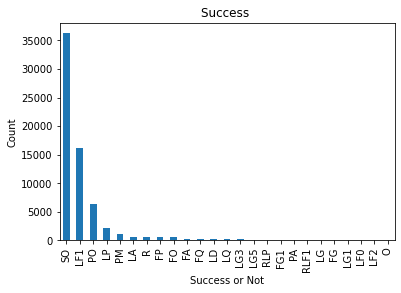

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt
data.code.value_counts().plot(kind='bar')
plt.xlabel("Success or Not")
plt.ylabel("Count")
plt.title("Success ")

<AxesSubplot:xlabel='code', ylabel='count'>

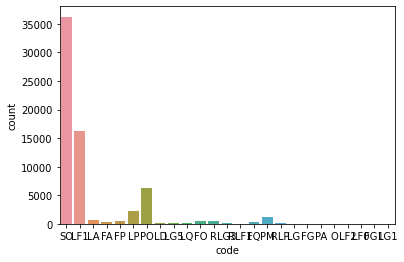

In [24]:
sns.countplot(y)

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [26]:
#Setup a knn classifier with k neighbors
Model = SVC()

In [27]:
#Fit the model
Model.fit(X_train,y_train)

SVC()

In [28]:
Model.score(X_test,y_test) # Accuracy of the model

0.7670006612074666

In [29]:
Model.score(X_train,y_train) # Accuracy of the model

0.77416401447443

In [ ]:
y_pred = Model.predict(X_test)

In [ ]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(20, 20))
sns.heatmap(mat, annot=True)

In [ ]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
param_grid = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']},
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
 ]

In [ ]:
svc = SVC()
gs = GridSearchCV(estimator=svc,param_grid=param_grid,scoring="accuracy", cv=10)
grid_search = gs.fit(X_train,y_train)
best_score = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Score:",best_score)
print("Best Parameters:",best_parameters)

In [ ]:
Model = SVC(**best_parameters)

In [ ]:
dt_acc = metrics.accuracy_score(y_test, y_pred)
print(dt_acc)